Ejercicio de Regresión Logistica (Cindy Moreno)


In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os 
import matplotlib.pyplot  as  plt 
import matplotlib.pylab  as  ptr 
import seaborn as sb
%matplotlib inline
from pylab import *

In [2]:
datos = pd.read_csv("../Documents/Analisis de datos Fase 2/Regresión Logistica/framingham.csv")

In [7]:
datos.head(16)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [13]:
datos.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [49]:


X = datos[['diabetes','male','age']]
y = datos[['glucose']]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = LogisticRegression()

In [57]:
datos[['diabetes','glucose']].head(16)

,diabetes,glucose
0,0,77.0
1,0,76.0
2,0,70.0
3,0,103.0
4,0,85.0
5,0,99.0
6,0,85.0
7,0,78.0
8,0,79.0
9,0,88.0


<Axes: xlabel='glucose', ylabel='diabetes'>

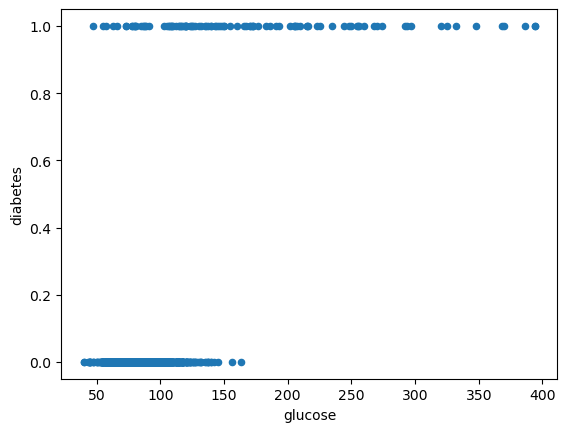

In [135]:
datos[['glucose','diabetes']].plot.scatter(x='glucose',y='diabetes')

In [141]:
# pruebas de parametro
w = 0.09
b = -3.6

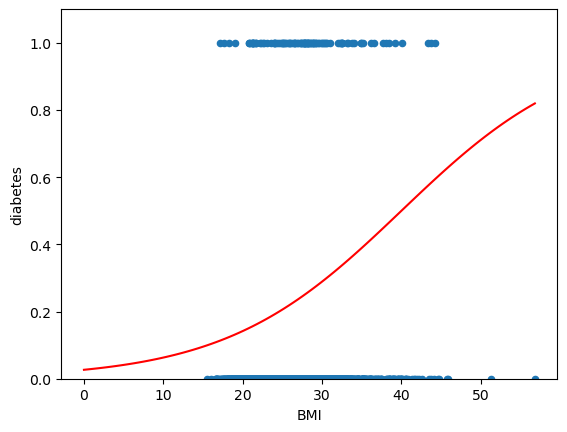

In [142]:
# puntos de la recta
x = np.linspace(0,datos['BMI'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

datos.plot.scatter(x='BMI', y='diabetes')
plt.plot(x,y, '-r')
plt.ylim(0,datos['diabetes'].max()*1.1)
plt.show()

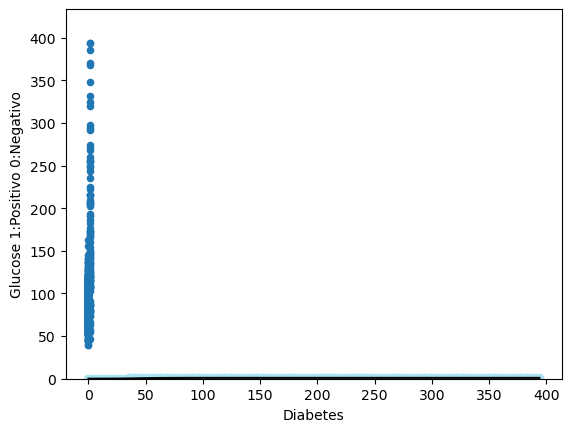

In [138]:
# grafica de la recta
datos.plot.scatter(x='diabetes',y='glucose')
plt.plot(x, y, color='black')
plt.ylim(0,datos['glucose'].max()*1.1)
plt.scatter(x, y, color='#A9E2F3')
# plt.grid()
plt.xlabel('Diabetes')
plt.ylabel('Glucose 1:Positivo 0:Negativo')
plt.show()

In [72]:
datos.value_counts().sort_index()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI    heartRate  glucose  TenYearCHD
0     32   2.0        1              15.0        0.0     0                0             0         242.0    111.0  70.0   29.84  80.0       88.0     0             1
      33   1.0        0              0.0         0.0     0                0             0         158.0    108.0  67.0   19.84  86.0       69.0     0             1
           2.0        1              5.0         0.0     0                0             0         200.0    119.0  74.0   23.80  75.0       74.0     0             1
           3.0        1              15.0        0.0     0                0             0         199.0    116.0  81.0   21.61  75.0       93.0     0             1
      34   1.0        1              20.0        0.0     0                0             0         175.0    117.5  73.5   22.15  65.0       75.0     0             1
                     

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

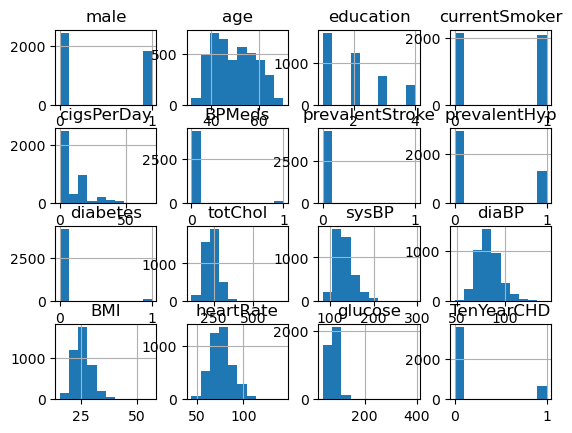

In [103]:
datos.hist()

In [109]:
cantidad_diabetes = datos.groupby(['diabetes']).count()['age']

In [105]:
cantidad_diabetes

diabetes
0    4129
1     109
Name: age, dtype: int64